# Storage QPI Report

In [1]:
%matplotlib inline
import json
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import qgrid

qgrid.nbinstall(overwrite=True)

RESULT_FILE = './zte-apex-virtual.json'
with open(RESULT_FILE, 'r') as f:
    result_data = json.load(f)
metrics = result_data['report']['metrics']

# TODO(yujunz) move common functiont to qtip package

def metrics_to_dataframe(metrics):
    """convert storperf metrics to DataFrame"""
    def _convert(metric, value):
        columns = metric.split('.')
        return {
            'workload_name': columns[0],
            'queue_depth': columns[2],
            'block_size': columns[4],
            'read_write': columns[5],
            'metric_name': ('.').join(columns[6:]),
            'value': value
        }

    return pd.DataFrame([_convert(*p) for p in metrics.items()])

def get_metric(metric_name):
    return df[df.metric_name == metric_name]

def plot_metric(metric_name):
    df_metric = get_metric(metric_name)
    fig = plt.figure(figsize=(16,9))

    ax = fig.add_subplot(111, projection='3d')
    for wl, rw, c in zip(['rw', 'rw', 'wr', 'rr'], ['read', 'write', 'write', 'read'], ['r', 'g', 'b', 'y']):
        _df = df_metric[(df_metric.workload_name == wl) & (df_metric.read_write == rw)]
        ax.scatter(_df.block_size, _df.queue_depth, _df['value'], c=c, label='{}.{}'.format(wl, rw))

    ax.set_xlabel('block size')
    ax.set_ylabel('queue depth')
    ax.set_zlabel(metric_name)
    ax.legend()

df = metrics_to_dataframe(metrics)

# filter invalid data
df = df[(df.workload_name != '_warm_up') & (df.value != 0.0)]
df.block_size = df.block_size.astype(int)
df.queue_depth = df.queue_depth.astype(int)

## Test Results

### Bandwidth

In [2]:
get_metric('bw')

,block_size,metric_name,queue_depth,read_write,value,workload_name
0,8192,bw,8,read,3866.250000,rw
2,1024,bw,2,read,293.583333,rw
8,8192,bw,8,write,1661.950000,rw
9,8192,bw,4,write,2463.000000,wr
11,8192,bw,1,read,1690.750000,rw
13,1024,bw,8,read,769.750000,rw
19,1024,bw,4,write,294.900000,wr
24,8192,bw,2,read,8750.000000,rr
35,2048,bw,4,read,679.708333,rw
39,1024,bw,8,write,329.708333,rw


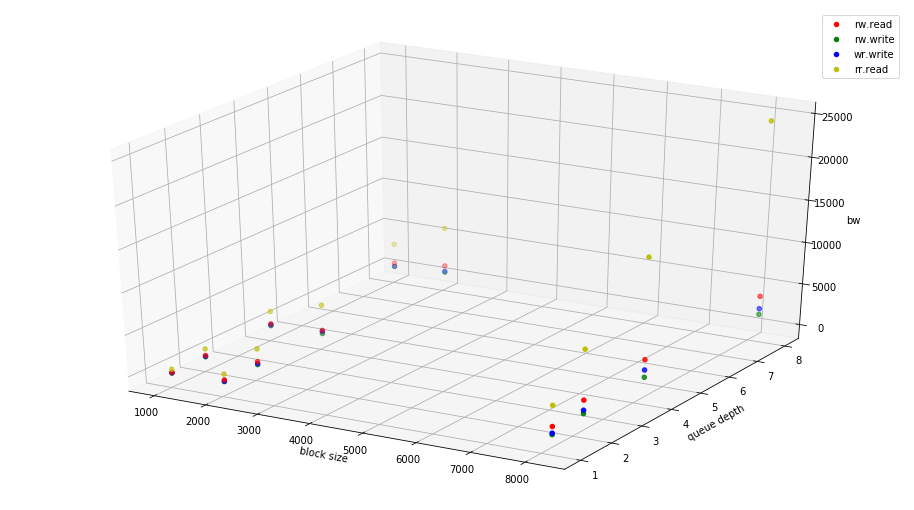

In [3]:
plot_metric('bw')

### IOPS

In [4]:
get_metric('iops')

,block_size,metric_name,queue_depth,read_write,value,workload_name
5,8192,iops,2,read,1093.824000,rr
6,8192,iops,4,read,461.590833,rw
12,8192,iops,4,read,1956.680000,rr
15,2048,iops,8,write,304.399583,rw
29,2048,iops,8,read,709.907500,rw
40,2048,iops,4,write,285.147500,wr
49,8192,iops,4,write,307.961500,wr
65,1024,iops,2,read,1091.409500,rr
67,1024,iops,1,write,116.311000,wr
70,1024,iops,2,write,126.258333,rw


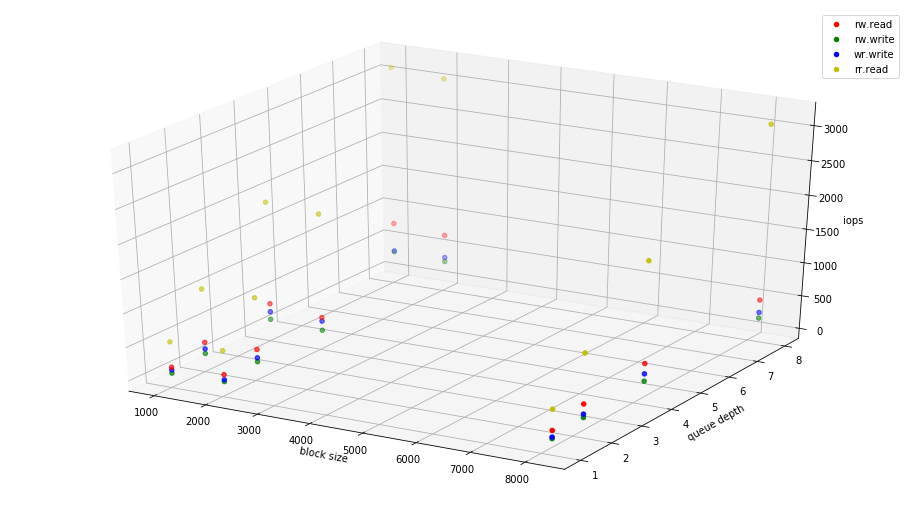

In [5]:
plot_metric('iops')

### Latency

In [6]:
get_metric('lat.mean')

,block_size,metric_name,queue_depth,read_write,value,workload_name
1,2048,lat.mean,4,read,2612.727083,rw
3,2048,lat.mean,1,write,9398.356500,wr
4,8192,lat.mean,2,write,8210.290000,rw
7,8192,lat.mean,1,read,1917.286000,rr
16,8192,lat.mean,8,write,30455.084250,rw
18,1024,lat.mean,2,read,2297.477917,rw
21,2048,lat.mean,4,write,21437.647917,rw
22,1024,lat.mean,2,write,10573.252083,rw
23,8192,lat.mean,4,read,2657.303333,rw
26,2048,lat.mean,4,write,14039.599500,wr


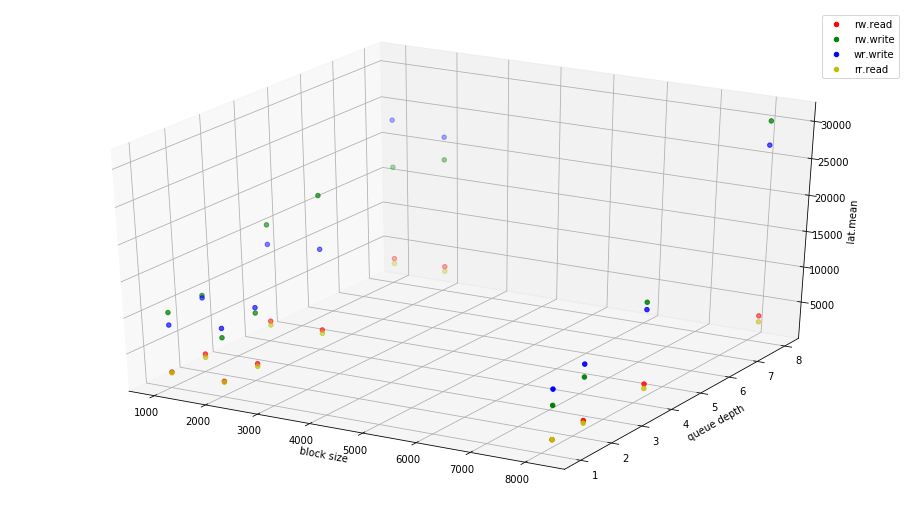

In [7]:
plot_metric('lat.mean')

## System Information

### Hardware

TBD

### Software

TBD

## Test Configuration

TBD